# Explanatory Data Analysis

In [2]:
from pathlib import Path
import json
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = Path.cwd().parent / 'data'

In [4]:
for file in data_path.glob('*'):
    print(file.name)

enefit
.DS_Store
client.csv
weather_station_to_county_mapping.csv
gas_prices.csv
forecast_weather.csv
electricity_prices.csv
example_test_files
county_id_to_name_map.json
public_timeseries_testing_util.py
train.csv
historical_weather.csv


In [5]:
def load_file(file_name, data_path=data_path, file_extension='csv'):
    filepath = data_path / (file_name + '.' + file_extension)
    if file_extension == 'csv':
        return pd.read_csv(filepath)
    elif file_extension == 'json':
        with open(filepath) as json_file:
            file = json.load(json_file)
        return file
    else:
        raise ValueError('Wrong `file_extension` argument')

In [6]:
def plot_hist(series, bins=50):
    plt.figure(figsize=(12, 6))
    plt.hist(series, edgecolor='black', bins=bins)
    plt.show()

In [7]:
def plot_category_distribution(cat_counts, x=None):
    if x is None:
        x = cat_counts.index
    plt.figure(figsize=(12, 8))
    sns.barplot(x=x, y=cat_counts.values, hue=cat_counts.index, palette='Blues_d', legend=False)
    plt.plot('Distribution of categories')
    plt.xlabel('Category')
    plt.xticks(rotation=30, ha='right')
    for i, v in enumerate(cat_counts):
        plt.text(i, v + 1000, str(v), ha='center')
    plt.show()

In [8]:
def plot_boxplot(data, x, y):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=x, y=y, data=data)
    plt.show()

## 1. Main dataset - train.csv

In [9]:
train = load_file('train')

In [10]:
train.head(10)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
5,0,0,3,656.859,1,2021-09-01 00:00:00,0,5,2
6,0,1,0,0.000,0,2021-09-01 00:00:00,0,6,3
7,0,1,0,59.000,1,2021-09-01 00:00:00,0,7,3
8,0,1,1,0.000,0,2021-09-01 00:00:00,0,8,4
9,0,1,1,501.760,1,2021-09-01 00:00:00,0,9,4


Columns explaination:
* **county** - An ID code for the county.
* **is_business** - Boolean for whether or not the prosumer is a business.
* **product_type** - ID code with the following mapping of codes to contract types: {0: "Combined", 1: "Fixed", 2: "General service", 3: "Spot"}.
* ***target*** - The consumption or production amount for the relevant segment for the hour. The segments are defined by the county, is_business, and product_type.
* **is_consumption** - Boolean for whether or not this row's target is consumption or production.
* **datetime** - The Estonian time in EET (UTC+2) / EEST (UTC+3). It describes the start of the 1-hour period on which target is given.
* **data_block_id** - All rows sharing the same data_block_id will be available at the same forecast time. This is a function of what information is available when forecasts are actually made, at 11 AM each morning. For example, if the forecast weather data_block_id for predictins made on October 31st is 100 then the historic weather data_block_id for October 31st will be 101 as the historic weather data is only actually available the next day.
* **row_id** - A unique identifier for the row.
* **prediction_unit_id** - A unique identifier for the county, is_business, and product_type combination. New prediction units can appear or disappear in the test set.

In [11]:
train.shape

(2018352, 9)

In [12]:
train.dtypes

county                  int64
is_business             int64
product_type            int64
target                float64
is_consumption          int64
datetime               object
data_block_id           int64
row_id                  int64
prediction_unit_id      int64
dtype: object

In [13]:
train.isna().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [14]:
train.describe()

,county,is_business,product_type,target,is_consumption,data_block_id,row_id,prediction_unit_id
count,2.018352e+06,2.018352e+06,2.018352e+06,2.017824e+06,2018352.0,2.018352e+06,2.018352e+06,2.018352e+06
mean,7.297034e+00,5.368261e-01,1.898927e+00,2.748556e+02,0.5,3.218746e+02,1.009176e+06,3.304538e+01
std,4.780990e+00,4.986421e-01,1.081766e+00,9.095024e+02,0.5,1.826343e+02,5.826482e+05,1.959059e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,1.000000e+00,3.780000e-01,0.0,1.660000e+02,5.045878e+05,1.600000e+01
50%,7.000000e+00,1.000000e+00,2.000000e+00,3.113300e+01,0.5,3.230000e+02,1.009176e+06,3.300000e+01
75%,1.100000e+01,1.000000e+00,3.000000e+00,1.802062e+02,1.0,4.790000e+02,1.513763e+06,5.000000e+01
max,1.500000e+01,1.000000e+00,3.000000e+00,1.548027e+04,1.0,6.370000e+02,2.018351e+06,6.800000e+01


### 1.1 county

In [15]:
train['county'].unique()
# we have 15 counties in dataset

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [16]:
county_map_json = load_file('county_id_to_name_map', file_extension='json')

In [17]:
county_map_json = {int(k): v for k, v in county_map_json.items()}

In [18]:
county_distribution = train['county'].value_counts()
#imbalanced counties
county_distribution = county_distribution.rename(index=county_map_json)
county_distribution

county
HARJUMAA         212928
TARTUMAA         198000
PÄRNUMAA         173088
LÄÄNE-VIRUMAA    151632
VÕRUMAA          148752
JÕGEVAMAA        147264
SAAREMAA         134640
VILJANDIMAA      125808
JÄRVAMAA         122496
RAPLAMAA         122496
VALGAMAA         121056
IDA-VIRUMAA      115200
HIIUMAA           91872
PÕLVAMAA          91872
LÄÄNEMAA          30624
UNKNOWN           30624
Name: count, dtype: int64

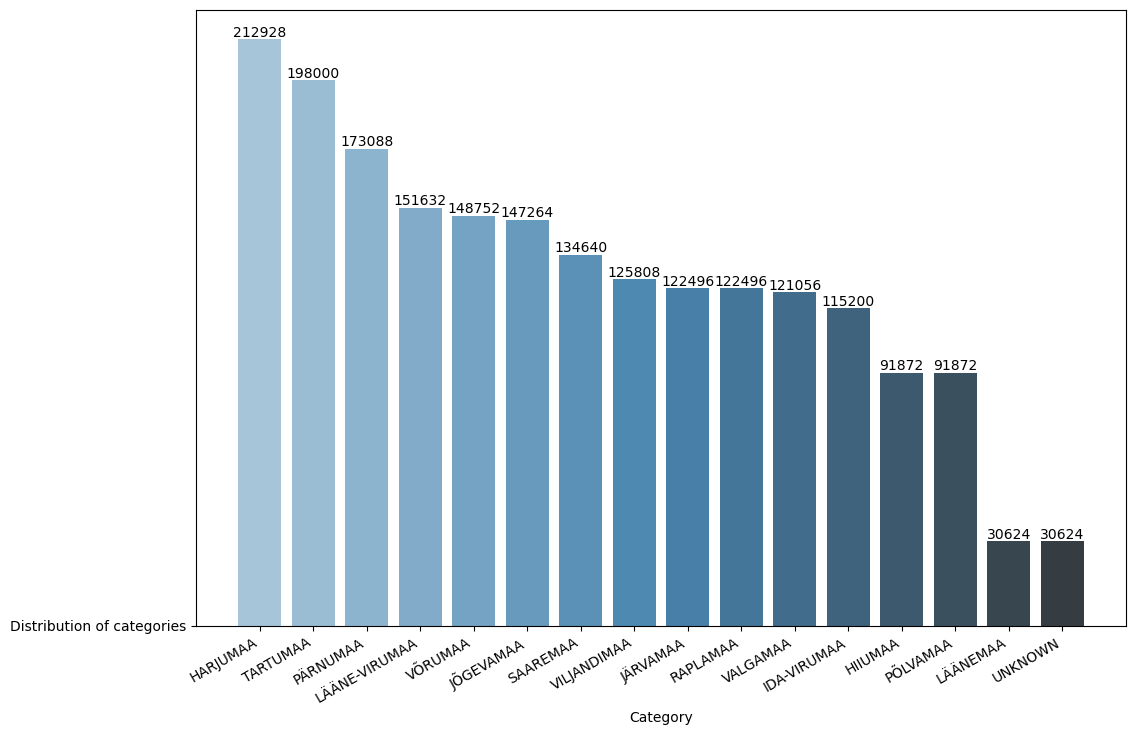

In [19]:
plot_category_distribution(county_distribution)

In [20]:
# there is 'Unknown' county (id=12)

### 1.2. is_business

In [21]:
train['is_business'].value_counts()
# ~53.6% of all prosumers are businesses

is_business
1    1083504
0     934848
Name: count, dtype: int64

### 1.3 product_type

In [22]:
product_type_distribution = train['product_type'].value_counts()
product_type_dict = {
    3: 'Spot',
    2: 'Fixed',
    1: 'Combined',
    0: 'General service'
}
product_type_distribution = product_type_distribution.rename(index=product_type_dict)
# as follows: Spot, Fixed, Combined, General service

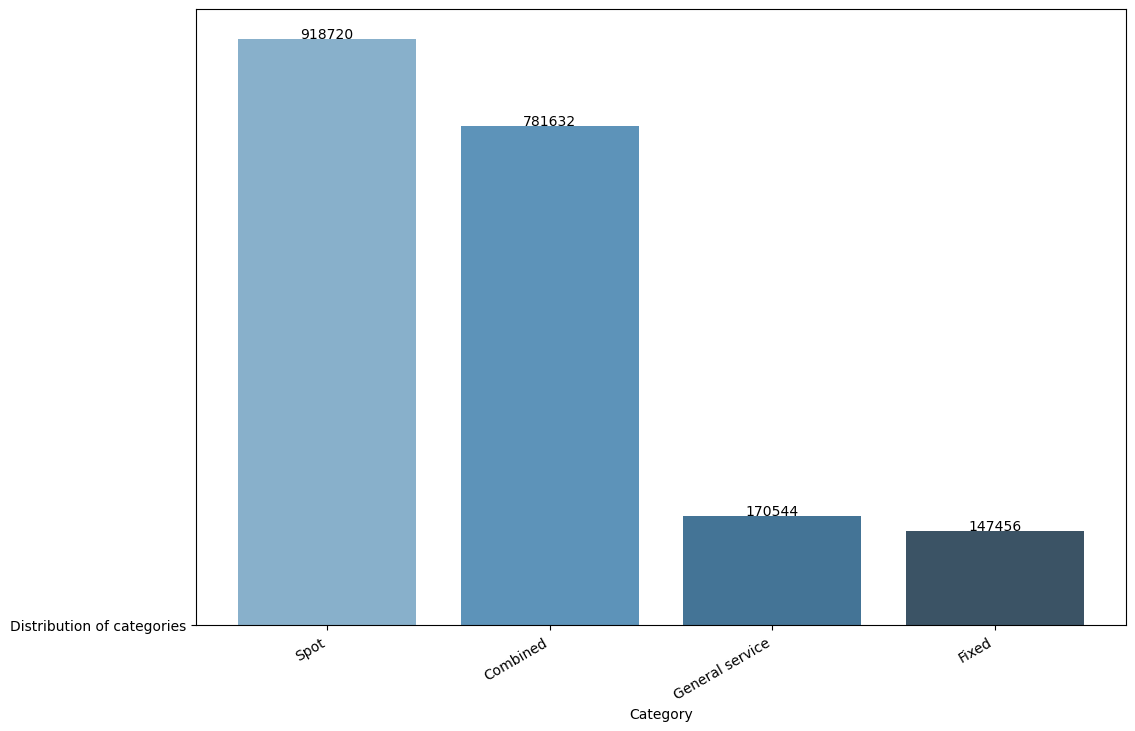

In [23]:
plot_category_distribution(product_type_distribution)

### 1.4 target

In [24]:
# there is 528 NaNs

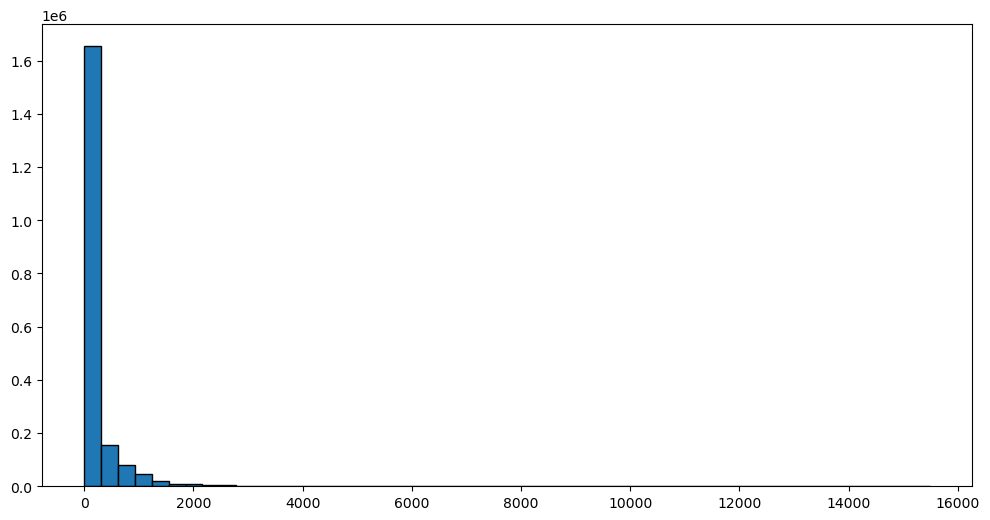

In [25]:
plot_hist(train['target'])

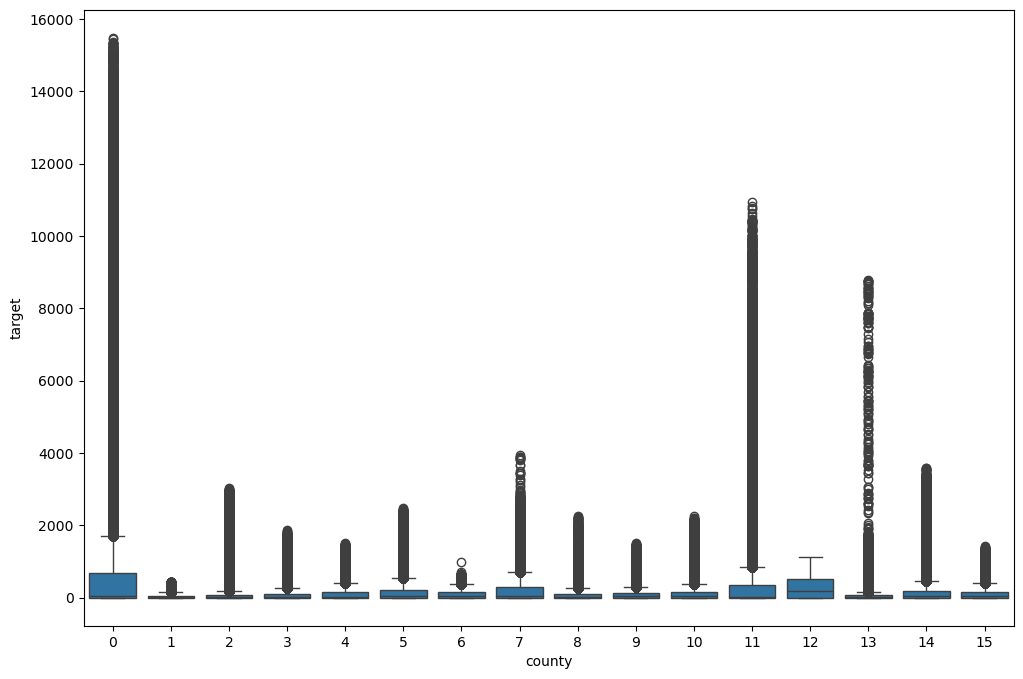

In [26]:
plot_boxplot(x='county', y='target', data=train)

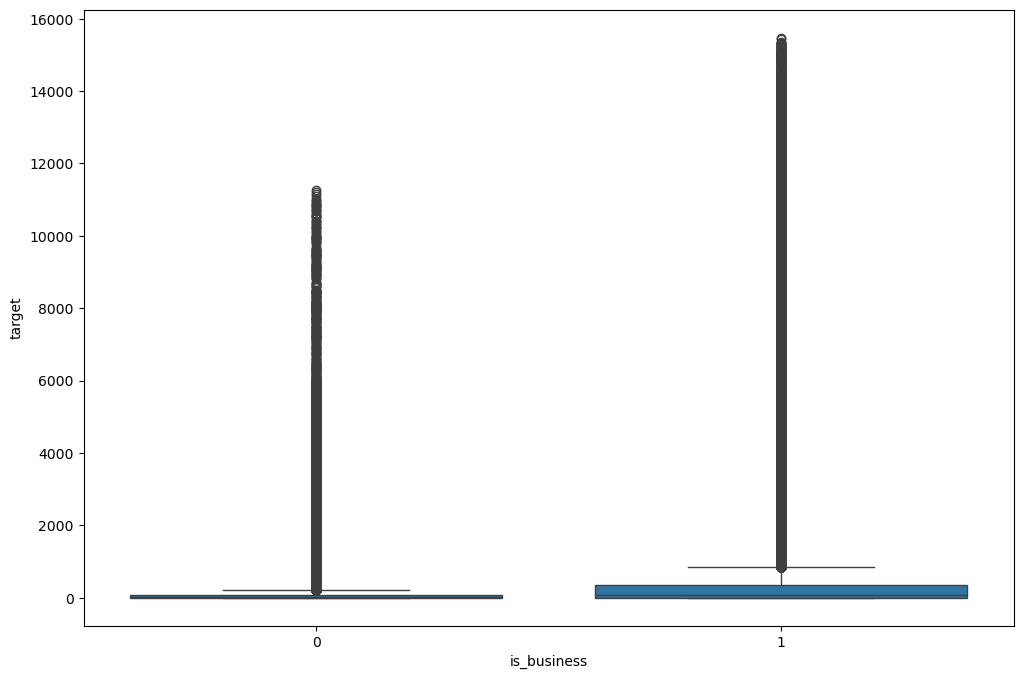

In [27]:
plot_boxplot(x='is_business', y='target', data=train)

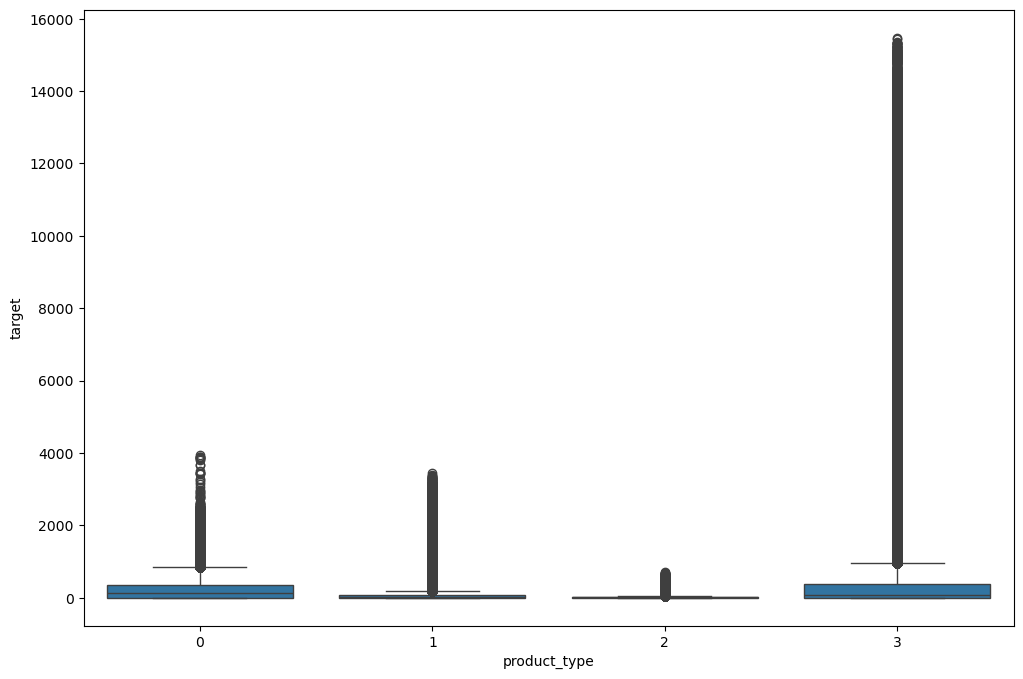

In [28]:
plot_boxplot(x='product_type', y='target', data=train)

In [29]:
# The highest values (outliers) for county 0 (HARJUMAA), business prosumer and Spot contract type

### 1.5. is_consumption

In [30]:
train['is_consumption'].value_counts()  # 50 / 50 consumption vs production

is_consumption
0    1009176
1    1009176
Name: count, dtype: int64

### 1.6 datetime

In [31]:
train['datetime'][:150]

0      2021-09-01 00:00:00
1      2021-09-01 00:00:00
2      2021-09-01 00:00:00
3      2021-09-01 00:00:00
4      2021-09-01 00:00:00
              ...         
145    2021-09-01 01:00:00
146    2021-09-01 01:00:00
147    2021-09-01 01:00:00
148    2021-09-01 01:00:00
149    2021-09-01 01:00:00
Name: datetime, Length: 150, dtype: object

In [32]:
train[train['prediction_unit_id']==64]
# 61 - 64 unit_id time series starts 1 month later

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
272424,15,1,0,0.000,0,2021-12-01 00:00:00,91,272424,64
272425,15,1,0,151.349,1,2021-12-01 00:00:00,91,272425,64
272550,15,1,0,0.000,0,2021-12-01 01:00:00,91,272550,64
272551,15,1,0,139.268,1,2021-12-01 01:00:00,91,272551,64
272676,15,1,0,0.000,0,2021-12-01 02:00:00,91,272676,64
...,...,...,...,...,...,...,...,...,...
2018087,15,1,0,323.350,1,2023-05-31 21:00:00,637,2018087,64
2018216,15,1,0,0.000,0,2023-05-31 22:00:00,637,2018216,64
2018217,15,1,0,207.244,1,2023-05-31 22:00:00,637,2018217,64
2018346,15,1,0,0.000,0,2023-05-31 23:00:00,637,2018346,64


In [33]:
random_prediction_unit = np.random.randint(train['prediction_unit_id'].max())
random_prediction_unit

0

<Axes: xlabel='datetime', ylabel='target'>

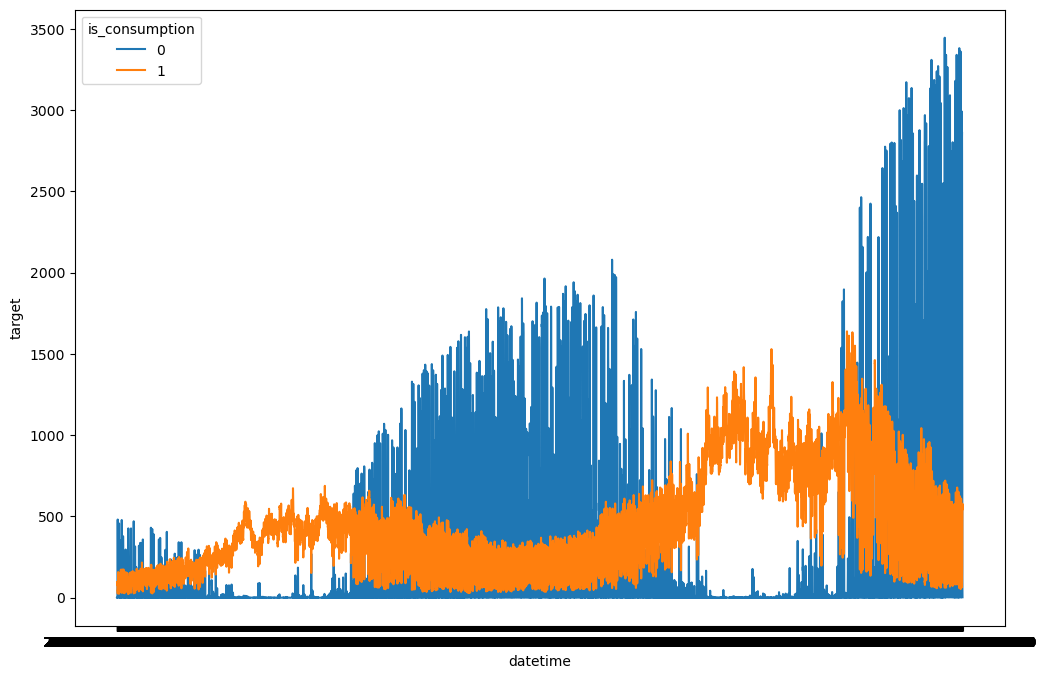

In [34]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=train[train['prediction_unit_id']==random_prediction_unit], x='datetime', y='target', hue='is_consumption')

In [35]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime'] = train['datetime'].dt.tz_localize('Europe/Tallinn', ambiguous='NaT', nonexistent='NaT')

In [36]:
train[train['datetime'].isna()]
# NaNs are present only when time is changing

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
178938,0,0,1,NaN,0,NaT,60,178938,0
178939,0,0,1,NaN,1,NaT,60,178939,0
178940,0,0,2,NaN,0,NaT,60,178940,1
178941,0,0,2,NaN,1,NaT,60,178941,1
178942,0,0,3,NaN,0,NaT,60,178942,2
...,...,...,...,...,...,...,...,...,...
1806379,15,1,0,NaN,1,NaT,571,1806379,64
1806380,15,1,1,NaN,0,NaT,571,1806380,59
1806381,15,1,1,NaN,1,NaT,571,1806381,59
1806382,15,1,3,NaN,0,NaT,571,1806382,60


### 1.7. data_block_id

In [37]:
train['data_block_id']
# data_block_id 'i' tells us which dataset we have on day 'i'

0            0
1            0
2            0
3            0
4            0
          ... 
2018347    637
2018348    637
2018349    637
2018350    637
2018351    637
Name: data_block_id, Length: 2018352, dtype: int64

In [38]:
train[train['data_block_id']==1]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
2928,0,0,1,1.687,0,2021-09-02 00:00:00+03:00,1,2928,0
2929,0,0,1,109.366,1,2021-09-02 00:00:00+03:00,1,2929,0
2930,0,0,2,0.000,0,2021-09-02 00:00:00+03:00,1,2930,1
2931,0,0,2,21.008,1,2021-09-02 00:00:00+03:00,1,2931,1
2932,0,0,3,1.003,0,2021-09-02 00:00:00+03:00,1,2932,2
...,...,...,...,...,...,...,...,...,...
5851,15,0,3,59.302,1,2021-09-02 23:00:00+03:00,1,5851,58
5852,15,1,1,0.000,0,2021-09-02 23:00:00+03:00,1,5852,59
5853,15,1,1,21.756,1,2021-09-02 23:00:00+03:00,1,5853,59
5854,15,1,3,0.000,0,2021-09-02 23:00:00+03:00,1,5854,60


## 1.8. prediction_unit_id

In [39]:
train[train['prediction_unit_id'] == 0]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00+03:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00+03:00,0,1,0
122,0,0,1,1.132,0,2021-09-01 01:00:00+03:00,0,122,0
123,0,0,1,77.691,1,2021-09-01 01:00:00+03:00,0,123,0
244,0,0,1,0.490,0,2021-09-01 02:00:00+03:00,0,244,0
...,...,...,...,...,...,...,...,...,...
2017963,0,0,1,569.301,1,2023-05-31 21:00:00+03:00,637,2017963,0
2018092,0,0,1,5.086,0,2023-05-31 22:00:00+03:00,637,2018092,0
2018093,0,0,1,577.499,1,2023-05-31 22:00:00+03:00,637,2018093,0
2018222,0,0,1,2.921,0,2023-05-31 23:00:00+03:00,637,2018222,0


In [40]:
train[(train['prediction_unit_id'] == 0) & (train['data_block_id'] == 1)]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
2928,0,0,1,1.687,0,2021-09-02 00:00:00+03:00,1,2928,0
2929,0,0,1,109.366,1,2021-09-02 00:00:00+03:00,1,2929,0
3050,0,0,1,1.785,0,2021-09-02 01:00:00+03:00,1,3050,0
3051,0,0,1,97.033,1,2021-09-02 01:00:00+03:00,1,3051,0
3172,0,0,1,1.199,0,2021-09-02 02:00:00+03:00,1,3172,0
3173,0,0,1,104.854,1,2021-09-02 02:00:00+03:00,1,3173,0
3294,0,0,1,0.826,0,2021-09-02 03:00:00+03:00,1,3294,0
3295,0,0,1,103.433,1,2021-09-02 03:00:00+03:00,1,3295,0
3416,0,0,1,0.897,0,2021-09-02 04:00:00+03:00,1,3416,0
3417,0,0,1,105.858,1,2021-09-02 04:00:00+03:00,1,3417,0


## 2. Second dataset - gas_prices.csv

In [41]:
df_gas = load_file('gas_prices')

In [42]:
df_gas.head()
# at the day 't' we have information about gas prices forecasted on day t-1, predicted on day t-2

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [43]:
df_gas.info()
#there are no missing values, but we have to convert dates into datetimes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   forecast_date          637 non-null    object 
 1   lowest_price_per_mwh   637 non-null    float64
 2   highest_price_per_mwh  637 non-null    float64
 3   origin_date            637 non-null    object 
 4   data_block_id          637 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 25.0+ KB


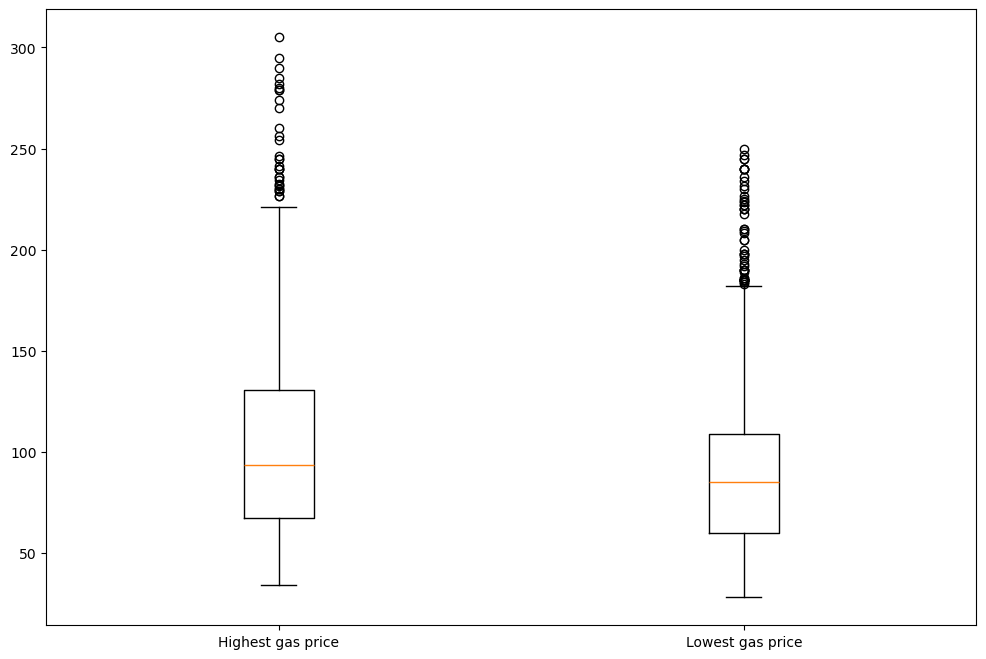

In [44]:
plt.figure(figsize=(12, 8))
plt.boxplot([df_gas['highest_price_per_mwh'], df_gas['lowest_price_per_mwh']], positions=[1, 2])
plt.xticks([1, 2], ['Highest gas price', 'Lowest gas price']);

In [45]:
df_gas['forecast_date'] = pd.to_datetime(df_gas['forecast_date'])

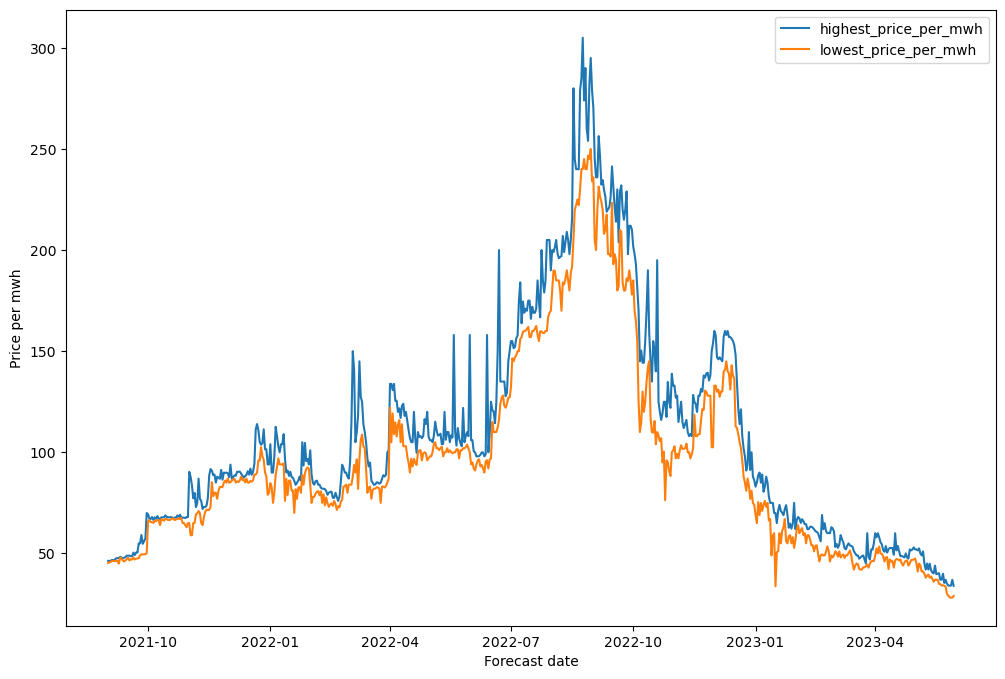

In [46]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gas, x='forecast_date', y='highest_price_per_mwh', label='highest_price_per_mwh')
sns.lineplot(data=df_gas, x='forecast_date', y='lowest_price_per_mwh', label='lowest_price_per_mwh')
plt.xlabel('Forecast date')
plt.ylabel('Price per mwh');

## 3. Third dataset - client.csv

In [47]:
df_client = load_file('client')

In [48]:
df_client

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2
...,...,...,...,...,...,...,...
41914,1,15,51,415.60,0,2023-05-29,637
41915,3,15,161,2035.75,0,2023-05-29,637
41916,0,15,15,620.00,1,2023-05-29,637
41917,1,15,20,624.50,1,2023-05-29,637


In [49]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41919 entries, 0 to 41918
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_type        41919 non-null  int64  
 1   county              41919 non-null  int64  
 2   eic_count           41919 non-null  int64  
 3   installed_capacity  41919 non-null  float64
 4   is_business         41919 non-null  int64  
 5   date                41919 non-null  object 
 6   data_block_id       41919 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.2+ MB


In [50]:
# when we are preparing prediction on day 't' for day 't+1' we have information about installed capacity of photovoltaics on day 't-2'

In [51]:
df_client[(df_client['data_block_id'] == 2) & (df_client['product_type'] == 1 ) & (df_client['county'] == 3 ) & (df_client['is_business'] == 0)]

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
11,1,3,16,179.9,0,2021-09-01,2


In [52]:
# for one combination of county, product_type and is_bussines at day 't' we have 1 value of installed capacity

In [53]:
df_client['date'] = pd.to_datetime(df_client['date'])

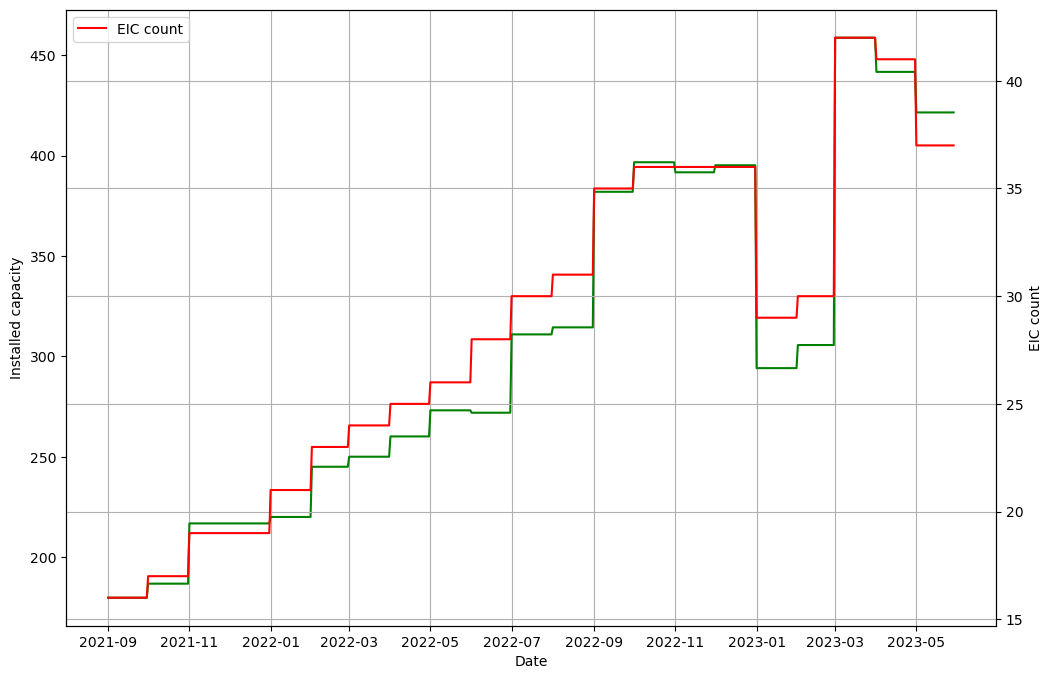

In [54]:
# choosing example combination of product_type, county and is_business
df_client_filtered = df_client[(df_client['product_type'] == 1 ) & (df_client['county'] == 3 ) & (df_client['is_business'] == 0)].copy()
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(df_client_filtered['date'], df_client_filtered['installed_capacity'], color='g', label='Installed capacity')
ax1.set_xlabel('Date')
ax1.set_ylabel('Installed capacity')


ax2 = ax1.twinx()
ax2.plot(df_client_filtered['date'], df_client_filtered['eic_count'], color='r', label='EIC count')
ax2.set_xlabel('Date')
ax2.set_ylabel('EIC count')

plt.legend()
ax1.grid(True, axis='x')
plt.grid()

plt.show()

In [55]:
# we can see that power increases in a stepwise manner. Probably it is related with inputting prosumers data into the system.
# The data at the beggining of every month

## 4. Fourth dataset - electricity_prices.csv

In [56]:
df_electricity = load_file('electricity_prices')

In [57]:
df_electricity.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [58]:
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15286 entries, 0 to 15285
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   forecast_date  15286 non-null  object 
 1   euros_per_mwh  15286 non-null  float64
 2   origin_date    15286 non-null  object 
 3   data_block_id  15286 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 477.8+ KB


In [59]:
df_electricity['forecast_date'] = pd.to_datetime(df_electricity['forecast_date'])

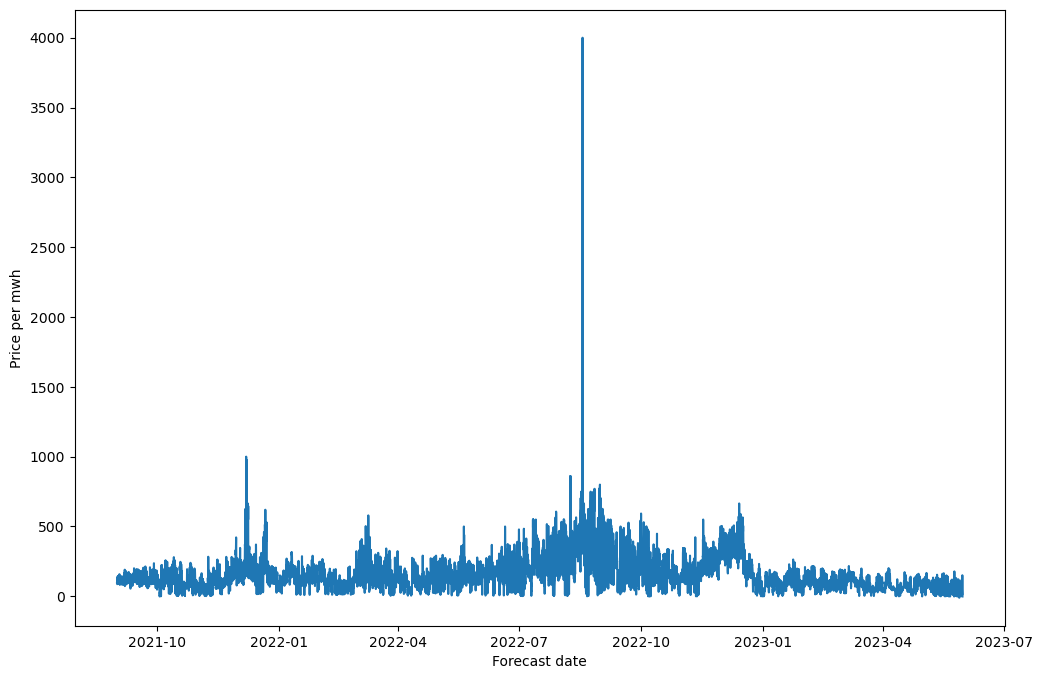

In [60]:
# it's really similar to gas_prices dataset
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_electricity, x='forecast_date', y='euros_per_mwh')
plt.xlabel('Forecast date')
plt.ylabel('Price per mwh');
# here is some significant outlier to remove from this dataset

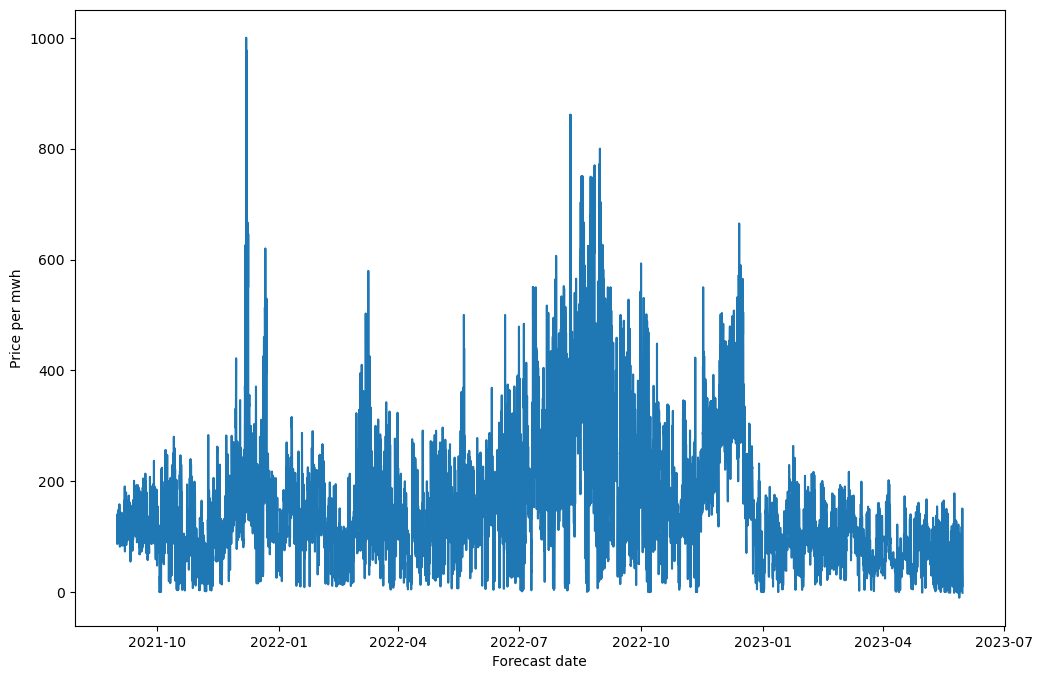

In [61]:
df_electricity_cut = df_electricity[df_electricity['euros_per_mwh'] < 1500]
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_electricity_cut, x='forecast_date', y='euros_per_mwh')
plt.xlabel('Forecast date')
plt.ylabel('Price per mwh');

## 5. Fifth dataset - forecast_weather.csv

In [62]:
df_forecast_weather = load_file('forecast_weather')
df_forecast_weather.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 02:00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 02:00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 02:00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 02:00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 02:00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0


In [63]:
df_forecast_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424512 entries, 0 to 3424511
Data columns (total 18 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   latitude                           float64
 1   longitude                          float64
 2   origin_datetime                    object 
 3   hours_ahead                        int64  
 4   temperature                        float64
 5   dewpoint                           float64
 6   cloudcover_high                    float64
 7   cloudcover_low                     float64
 8   cloudcover_mid                     float64
 9   cloudcover_total                   float64
 10  10_metre_u_wind_component          float64
 11  10_metre_v_wind_component          float64
 12  data_block_id                      int64  
 13  forecast_datetime                  object 
 14  direct_solar_radiation             float64
 15  surface_solar_radiation_downwards  float64
 16  snowfall          

## 6. historical_weather.csv

In [65]:
df_historical_weather = load_file('historical_weather')

In [67]:
df_historical_weather.head()

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0


In [66]:
df_historical_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710802 entries, 0 to 1710801
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   datetime                object 
 1   temperature             float64
 2   dewpoint                float64
 3   rain                    float64
 4   snowfall                float64
 5   surface_pressure        float64
 6   cloudcover_total        int64  
 7   cloudcover_low          int64  
 8   cloudcover_mid          int64  
 9   cloudcover_high         int64  
 10  windspeed_10m           float64
 11  winddirection_10m       int64  
 12  shortwave_radiation     float64
 13  direct_solar_radiation  float64
 14  diffuse_radiation       float64
 15  latitude                float64
 16  longitude               float64
 17  data_block_id           float64
dtypes: float64(12), int64(5), object(1)
memory usage: 234.9+ MB
